# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [6]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'

instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

print(dir(coco))

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

for key, val in enumerate(coco.anns):
    print(key)
    print(val)
    break

# get image ids 
ids = list(coco.anns.keys())

print('List of annotations ids: ')
print(ids[:5])

loading annotations into memory...
Done (t=6.45s)
creating index...
index created!
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'annToMask', 'annToRLE', 'anns', 'catToImgs', 'cats', 'createIndex', 'dataset', 'download', 'getAnnIds', 'getCatIds', 'getImgIds', 'imgToAnns', 'imgs', 'info', 'loadAnns', 'loadCats', 'loadImgs', 'loadNumpyAnnotations', 'loadRes', 'showAnns']
loading annotations into memory...
Done (t=0.42s)
creating index...
index created!
0
156
List of annotations ids: 
[156, 509, 603, 918, 1072]


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

1242339
534275
{'license': 5, 'file_name': 'COCO_val2014_000000534275.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000534275.jpg', 'height': 640, 'width': 427, 'date_captured': '2013-11-18 16:44:43', 'flickr_url': 'http://farm3.staticflickr.com/2245/2484047131_1cb6a84900_z.jpg', 'id': 534275}
http://images.cocodataset.org/val2014/COCO_val2014_000000534275.jpg


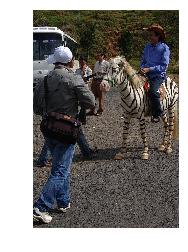

[{'image_id': 534275, 'id': 192218, 'caption': 'a person riding a small horse with a bus in the background'}, {'image_id': 534275, 'id': 199712, 'caption': 'A man riding a white-and-black striped horse that looks like a zebra.'}, {'image_id': 534275, 'id': 207554, 'caption': 'People and a bus near a man riding a zorse.  '}, {'image_id': 534275, 'id': 209360, 'caption': 'A man in hat riding a pony that looks like a zebra.'}, {'image_id': 534275, 'id': 225026, 'caption': 'a person riding a zebra while wearing a cowboy hat in the street.'}]
a person riding a small horse with a bus in the background
A man riding a white-and-black striped horse that looks like a zebra.
People and a bus near a man riding a zorse.  
A man in hat riding a pony that looks like a zebra.
a person riding a zebra while wearing a cowboy hat in the street.


In [13]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
print(ann_id)
img_id = coco.anns[ann_id]['image_id']
print(img_id)
img = coco.loadImgs(img_id)[0]
print(img)
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
# Note: These are the id numbers of the annotations for a given img object (look above)
annIds = coco_caps.getAnnIds(imgIds=img['id'])
# Note: These are he dicst containing [{'image_id': img_id, 'id': caption_id, 'caption': txt}, ...]
anns = coco_caps.loadAnns(annIds)
print(anns)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)